# Testing new mean error calculations

## Setup

### Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os import listdir
import pandas as pd
import pickle
import sys
from tqdm import tqdm

sys.path.append('../../../stationsim/')

from ensemble_kalman_filter import EnsembleKalmanFilter, EnsembleKalmanFilterType, ActiveAgentNormaliser
from stationsim_gcs_model import Model

sys.path.append('../')

from experiment_utils import Modeller, Processor, Visualiser

%matplotlib inline

### Functions

In [2]:
def __make_exit_observation_operator(population_size):
    a = np.identity(2 * population_size)
    b = np.zeros(shape=(2 * population_size, population_size))
    return np.hstack((a, b))


def __make_observation_operator(population_size, mode):
    if mode == EnsembleKalmanFilterType.STATE:
        return np.identity(2 * population_size)
    elif mode == EnsembleKalmanFilterType.DUAL_EXIT:
        return __make_exit_observation_operator(population_size)
    else:
        raise ValueError(f'Unexpected filter mode: {mode}')

        
def __make_state_vector_length(population_size, mode):
    if mode == EnsembleKalmanFilterType.STATE:
        return 2 * population_size
    elif mode == EnsembleKalmanFilterType.DUAL_EXIT:
        return 3 * population_size
    else:
        raise ValueError(f'Unexpected filter mode: {mode}')

        
def run_enkf(filter_params, model_params, normaliser, pickle_path, filter_id=0):
    # Set up filter params
    filter_params['error_normalisation'] = normaliser
    
    enkf = EnsembleKalmanFilter(Model, filter_params, model_params,
                                filtering=True, benchmarking=True)
    
    while enkf.active:
        enkf.step()
    name = normaliser.name if normaliser is not None else 'default'
    
    with open(pickle_path + f'filter_{name}_{filter_id}.pkl', 'wb') as f:
        pickle.dump(enkf, f)

### Constants and default parameter values

In [3]:
ensemble_size = 20
pop_size = 20
assimilation_period = 20
obs_noise_std = 1.0
mode = EnsembleKalmanFilterType.STATE
its = 20000

model_params = {'pop_total': pop_size,
                'do_print': False}

# Set up filter parameters
observation_operator = __make_observation_operator(pop_size, mode)
state_vec_length = __make_state_vector_length(pop_size, mode)
data_mode = EnsembleKalmanFilterType.STATE
data_vec_length = __make_state_vector_length(pop_size, data_mode)

filter_params = {'max_iterations': its,
                 'assimilation_period': assimilation_period,
                 'ensemble_size': ensemble_size,
                 'population_size': pop_size,
                 'vanilla_ensemble_size': ensemble_size,
                 'state_vector_length': state_vec_length,
                 'data_vector_length': data_vec_length,
                 'mode': mode,
                 'H': observation_operator,
                 'R_vector': obs_noise_std * np.ones(data_vec_length),
                 'keep_results': True,
                 'run_vanilla': True,
                 'vis': False}

In [4]:
normalisers = [None,
               ActiveAgentNormaliser.BASE,
               ActiveAgentNormaliser.MEAN_EN]

In [5]:
pickle_path = '../results/models/gcs_model/norm/'

## Run filters

In [6]:
for normaliser in normalisers:
    print(normaliser)
    for i in tqdm(range(10)):
        run_enkf(filter_params, model_params, normaliser, pickle_path, filter_id=i)

  0%|          | 0/10 [00:00<?, ?it/s]

None
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


../../../stationsim/ensemble_kalman_filter.py:148: RuntimeWarning: EnKF received unexpected vanilla_ensemble_size attribute.
  warns.warn(w, RuntimeWarning)
 10%|█         | 1/10 [00:47<07:09, 47.72s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 20%|██        | 2/10 [01:38<06:34, 49.28s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 30%|███       | 3/10 [02:36<06:14, 53.46s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 40%|████      | 4/10 [03:37<05:37, 56.24s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 50%|█████     | 5/10 [04:50<05:11, 62.38s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 60%|██████    | 6/10 [05:48<04:03, 60.86s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 70%|███████   | 7/10 [06:28<02:42, 54.03s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 80%|████████  | 8/10 [07:35<01:56, 58.37s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 90%|█████████ | 9/10 [08:13<00:51, 51.90s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


  0%|          | 0/10 [00:00<?, ?it/s]

ActiveAgentNormaliser.BASE
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 10%|█         | 1/10 [00:50<07:35, 50.59s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 20%|██        | 2/10 [01:48<07:17, 54.63s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 30%|███       | 3/10 [02:31<05:46, 49.48s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 40%|████      | 4/10 [03:24<05:05, 50.91s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 50%|█████     | 5/10 [04:51<05:19, 63.98s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 60%|██████    | 6/10 [05:59<04:21, 65.27s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 70%|███████   | 7/10 [06:51<03:02, 60.91s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 80%|████████  | 8/10 [07:48<01:59, 59.74s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 90%|█████████ | 9/10 [08:48<00:59, 59.78s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


  0%|          | 0/10 [00:00<?, ?it/s]

ActiveAgentNormaliser.MEAN_EN
Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 10%|█         | 1/10 [00:55<08:23, 55.95s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 20%|██        | 2/10 [01:41<06:36, 49.55s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 30%|███       | 3/10 [02:29<05:44, 49.16s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 40%|████      | 4/10 [03:52<06:14, 62.45s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 50%|█████     | 5/10 [04:46<04:57, 59.51s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 60%|██████    | 6/10 [05:47<03:59, 59.80s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 70%|███████   | 7/10 [06:41<02:53, 57.90s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 80%|████████  | 8/10 [07:35<01:53, 56.60s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


 90%|█████████ | 9/10 [08:23<00:54, 54.05s/it]

Running Ensemble Kalman Filter...
max_iterations:	20000
ensemble_size:	20
assimilation_period:	20
filter_type:	EnsembleKalmanFilterType.STATE


100%|██████████| 10/10 [09:19<00:00, 55.92s/it]


## Data Processing

### Read in Data

In [14]:
pickle_file_paths = [p for p in listdir(pickle_path) if p.endswith('.pkl')]

In [15]:
results = list()

for filter_pickle in pickle_file_paths:
    x = pickle_path + filter_pickle
    with open(x, 'rb') as f:
        enkf = pickle.load(f)
    
    normaliser_type = enkf.error_normalisation
    normaliser_name = 'default' if normaliser_type is None else normaliser_type.name
        
    metrics = pd.DataFrame(enkf.metrics)
    metrics['norm'] = normaliser_name
    results.append(metrics)

In [16]:
results = pd.concat(results)
results.head()

,time,forecast,obs,analysis,vanilla,norm
0,0,0.000000,1.534626,0.000000,0.000000,default
1,20,0.086004,1.190832,0.030119,0.110551,default
2,40,0.130471,1.090960,0.058406,0.203203,default
3,60,0.382920,1.397072,0.159305,0.429807,default
4,80,0.266722,1.186103,0.124888,0.496364,default


In [17]:
error_types = ['forecast', 'obs', 'analysis', 'vanilla']

In [18]:
output = list()

for i, row in results.iterrows():
    for et in error_types:
        d = {'time': row['time'],
             'norm': row['norm'],
             'variable':  et,
             'value': row[et]}
        output.append(d)

tidy_df = pd.DataFrame(output)
tidy_df.head()

,time,norm,variable,value
0,0,default,forecast,0.000000
1,0,default,obs,1.534626
2,0,default,analysis,0.000000
3,0,default,vanilla,0.000000
4,20,default,forecast,0.086004


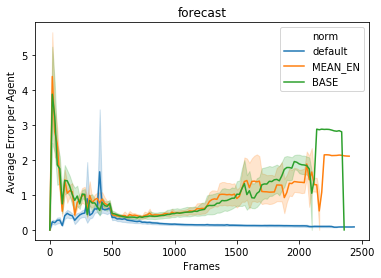

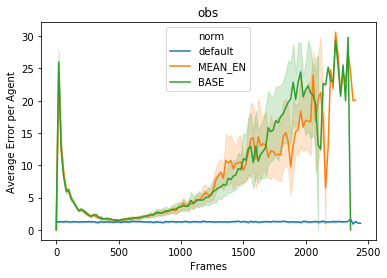

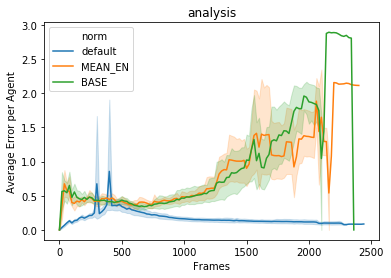

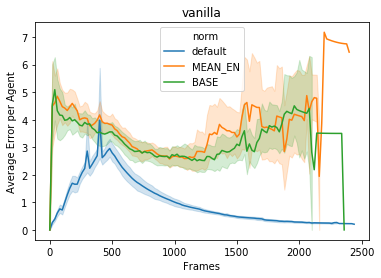

In [19]:
for var in tidy_df['variable'].unique():
    tdf = tidy_df.loc[tidy_df['variable']==var, :]
    plt.figure()
    sns.lineplot(data=tdf, x='time', y='value', hue='norm')
    plt.title(var)
    plt.xlabel('Frames')
    plt.ylabel('Average Error per Agent')
    plt.show()

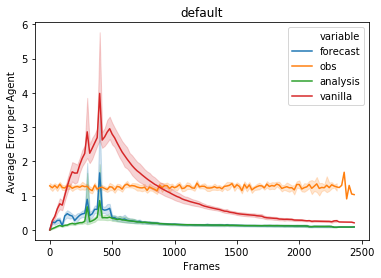

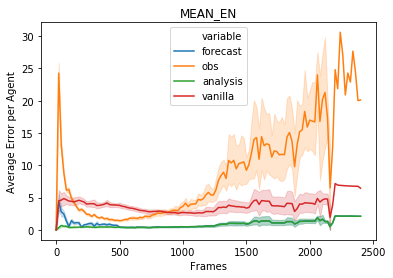

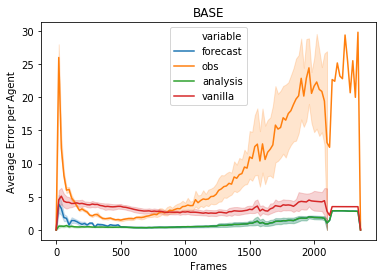

In [21]:
for n in tidy_df['norm'].unique():
    tdf = tidy_df.loc[tidy_df['norm']==n, :]
    plt.figure()
    sns.lineplot(data=tdf, x='time', y='value', hue='variable')
    plt.title(n)
    plt.xlabel('Frames')
    plt.ylabel('Average Error per Agent')
    plt.show()